In [18]:
# librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [147]:
# importer le dataset
data = pd.read_csv('train_pret.csv')

In [148]:
# recopier le dataset
df = data.copy()

In [149]:
df.drop('Loan_ID',axis=1, inplace=True)

In [150]:
# afficher le dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [151]:
# remplacer les valeurs manquantes
df.Gender.fillna('Male',inplace=True)
df.Married.fillna('Yes', inplace=True)
df.Dependents.fillna(0, inplace =True)
df.Self_Employed.fillna('No', inplace=True)
df.LoanAmount.fillna(146.41, inplace=True)
df.Loan_Amount_Term.fillna(360, inplace=True)
df.Credit_History.fillna(1.0, inplace=True)

In [152]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y


In [153]:
df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Dependents'],axis=1,inplace=True)

In [154]:
df.shape

(614, 7)

In [155]:
X = df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [156]:
cols =['Gender','Married', 'Education','Self_Employed','Credit_History','Property_Area']

for c in cols:
    X[c] =X[c].astype('category')

In [157]:
X

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,Graduate,No,1.0,Urban
1,Male,Yes,Graduate,No,1.0,Rural
2,Male,Yes,Graduate,Yes,1.0,Urban
3,Male,Yes,Not Graduate,No,1.0,Urban
4,Male,No,Graduate,No,1.0,Urban
...,...,...,...,...,...,...
609,Female,No,Graduate,No,1.0,Rural
610,Male,Yes,Graduate,No,1.0,Rural
611,Male,Yes,Graduate,No,1.0,Urban
612,Male,Yes,Graduate,No,1.0,Urban


In [84]:
# encodage des variable categoriel
enc = OrdinalEncoder()
enc.fit(X)
X= enc.transform(X)

In [87]:
X

array([[1., 0., 0., 0., 1., 2.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 1., 2.],
       ...,
       [1., 1., 0., 0., 1., 2.],
       [1., 1., 0., 0., 1., 2.],
       [0., 0., 0., 1., 0., 1.]])

In [85]:
y = y.map({'Y':1, 'N':0})

In [86]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [97]:
range_k = range(1,17)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = accuracy_score(y_test,y_pred)
   scores_list.append(accuracy_score(y_test,y_pred))
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[16 18]
 [ 0 89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        34
           1       0.83      1.00      0.91        89

    accuracy                           0.85       123
   macro avg       0.92      0.74      0.77       123
weighted avg       0.88      0.85      0.83       123



In [98]:
np.max(scores_list)

0.8536585365853658

Text(0, 0.5, 'Accuracy')

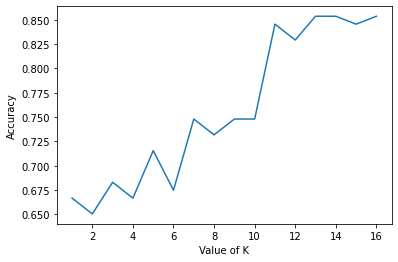

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [100]:
classifier = KNeighborsClassifier(n_neighbors = 14)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [101]:
import pickle
from joblib import dump, load
with open('dash.pkl', 'wb') as model_file:
  pickle.dump(classifier, model_file)

In [102]:
classifier = load('dash.pkl')

In [103]:
y_ded =classifier.predict(X_test)

In [104]:
confusion_matrix(y_test, y_ded)

array([[16, 18],
       [ 0, 89]])

In [105]:
accuracy_score(y_test, y_ded)

0.8536585365853658

In [106]:
precision_score(y_test, y_ded)

0.8317757009345794

In [107]:
f1_score(y_test, y_ded)

0.9081632653061225

In [221]:
# import du fichier a predire
data_json = {
    "nom": "lisa",
  "genre": "Female",
  "stat": "Yes",
  "envi": "Urban",
  "education": "Graduate",
  "nbrPersonne": "2",
  "revenu": "230000",
  "typetravail": "No",
  "pret": "500000",
  "duree": "7",
  "history": '1'
}

In [227]:
df = pd.DataFrame(np.array([data_json['genre'], data_json['stat'],
                            data_json['education'], data_json['typetravail'],
                            data_json['history'], data_json['envi']])).T
df.columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [228]:
df['Credit_History']= df['Credit_History'].astype(np.int64)

In [229]:
cols =['Gender','Married', 'Education','Self_Employed','Credit_History']

for c in cols:
    df[c] =df[c].astype('category')

In [230]:
df = enc.transform(df)

In [231]:
(df)

array([[0., 1., 0., 0., 1., 2.]])

In [234]:
w =classifier.predict_proba(df)

In [240]:
w[0][0]

0.14285714285714285